In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
drug_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = mouse_df.merge(drug_df,on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
grouped_mean_df = pd.DataFrame(combined_df.groupby(["Drug","Timepoint"],as_index=False)["Tumor Volume (mm3)"].mean())

# Preview DataFrame
grouped_mean_df.head(12)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
grouped_stddev_df = pd.DataFrame(combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index())

# Preview DataFrame
grouped_stddev_df.head(12)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [5]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mean_pivot_df = grouped_mean_df.pivot(columns="Drug",index="Timepoint")["Tumor Volume (mm3)"][["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
grouped_stddev_pivot_df = grouped_stddev_df.pivot(columns="Drug",index="Timepoint")["Tumor Volume (mm3)"][["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview that Reformatting worked
grouped_mean_pivot_df.head()
#grouped_stddev_pivot_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


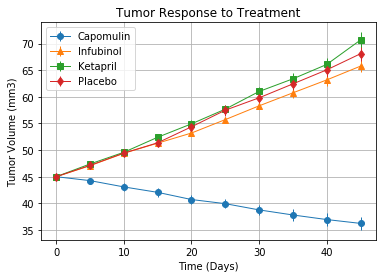

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(grouped_mean_pivot_df.index, grouped_mean_pivot_df["Capomulin"], grouped_stddev_pivot_df["Capomulin"], linewidth=1, marker="o")
plt.errorbar(grouped_mean_pivot_df.index, grouped_mean_pivot_df["Infubinol"], grouped_stddev_pivot_df["Infubinol"], linewidth=1, marker="^")
plt.errorbar(grouped_mean_pivot_df.index, grouped_mean_pivot_df["Ketapril"], grouped_stddev_pivot_df["Ketapril"], linewidth=1, marker="s")
plt.errorbar(grouped_mean_pivot_df.index, grouped_mean_pivot_df["Placebo"], grouped_stddev_pivot_df["Placebo"], linewidth=1, marker="d")
plt.grid(b=None, which='major', axis='both')
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.legend(loc="best")
# Save the Figure



In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
grouped_mean_df2 = pd.DataFrame(combined_df.groupby(["Drug","Timepoint"],as_index=False)["Metastatic Sites"].mean())

# Preview DataFrame
grouped_mean_df2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
grouped_stddev_df2 = pd.DataFrame(combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index())

# Preview DataFrame
grouped_stddev_df2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mean_pivot_df2 = grouped_mean_df2.pivot(columns="Drug",index="Timepoint")["Metastatic Sites"][["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
grouped_stddev_pivot_df2 = grouped_stddev_df2.pivot(columns="Drug",index="Timepoint")["Metastatic Sites"][["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview that Reformatting worked
grouped_mean_pivot_df2.head()
#grouped_stddev_pivot_df2.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


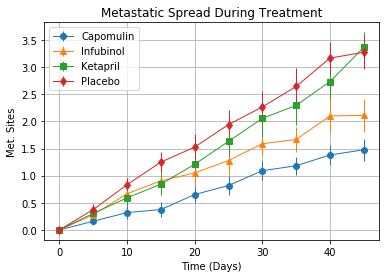

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(grouped_mean_pivot_df2.index, grouped_mean_pivot_df2["Capomulin"], grouped_stddev_pivot_df2["Capomulin"], linewidth=1, marker="o")
plt.errorbar(grouped_mean_pivot_df2.index, grouped_mean_pivot_df2["Infubinol"], grouped_stddev_pivot_df2["Infubinol"], linewidth=1, marker="^")
plt.errorbar(grouped_mean_pivot_df2.index, grouped_mean_pivot_df2["Ketapril"], grouped_stddev_pivot_df2["Ketapril"], linewidth=1, marker="s")
plt.errorbar(grouped_mean_pivot_df2.index, grouped_mean_pivot_df2["Placebo"], grouped_stddev_pivot_df2["Placebo"], linewidth=1, marker="d")
plt.grid(b=None, which='major', axis='both')
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Time (Days)")
plt.legend(loc="best")

# Save the Figure

# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
grouped_mean_df3 = pd.DataFrame(combined_df.groupby(["Drug","Timepoint"],as_index=False)["Mouse ID"].count())

# Preview DataFrame
grouped_mean_df3.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mean_pivot_df3 = grouped_mean_df3.pivot(columns="Drug",index="Timepoint")["Mouse ID"]

# Preview the Data Frame
grouped_mean_pivot_df3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


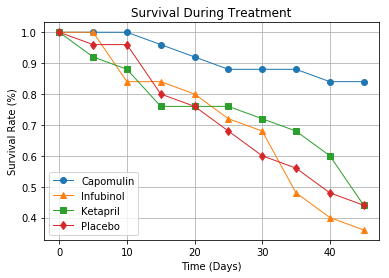

In [14]:
# Generate the Plot (Accounting for percentages)
plt.plot(grouped_mean_pivot_df3.index, grouped_mean_pivot_df3["Capomulin"]/grouped_mean_pivot_df3.loc[0,"Capomulin"], linewidth=1, marker="o")
plt.plot(grouped_mean_pivot_df3.index, grouped_mean_pivot_df3["Infubinol"]/grouped_mean_pivot_df3.loc[0,"Infubinol"], linewidth=1, marker="^")
plt.plot(grouped_mean_pivot_df3.index, grouped_mean_pivot_df3["Ketapril"]/grouped_mean_pivot_df3.loc[0,"Ketapril"], linewidth=1, marker="s")
plt.plot(grouped_mean_pivot_df3.index, grouped_mean_pivot_df3["Placebo"]/grouped_mean_pivot_df3.loc[0,"Placebo"], linewidth=1, marker="d")
plt.grid(b=None, which='major', axis='both')
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(loc="best")

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
pct_change = pd.DataFrame((grouped_mean_pivot_df.loc[45]-grouped_mean_pivot_df.loc[0])/grouped_mean_pivot_df.loc[0]*100)

# Display the data to confirm
pct_change

,0
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


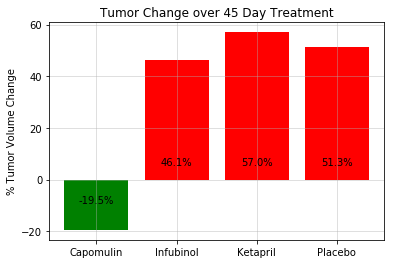

In [17]:
pct_change['colors'] = 'g'
pct_change.loc[pct_change[0]>=0,'colors'] = 'r'
fig, ax = plt.subplots()

rects = ax.bar(pct_change.index, pct_change[0], color=pct_change["colors"])
plt.yticks(np.arange(-20, 70, step=20))
plt.grid(b=None, axis='both', alpha=0.5)

for rect, label in zip(rects, pct_change[0]):
    if label > 0:
        height = 5
    else:
        height = -10
    ax.text(rect.get_x() + rect.get_width() / 2, height, '{:.1%}'.format(label/100),
            ha='center', va='bottom')

plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
fig.show()

In [ ]:
#Three Trends:

#Capomulin is the only drug of the 3 that showed a positive reduction in tumor size over time.

#Ketapril performed worse than the Placebo at slowing tumor growth.

#Infubinol had a smaller average spread than Ketapril or Placebo, but had a lower survival rate.